In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('wine_Austral2.dat', sep='\t')
df[['dry', 'month_']].head()

,dry,month_
0,1954,1
1,2302,2
2,3054,3
3,2414,4
4,2226,5


In [4]:
df[['dry', 'month_']].describe()

,dry,month_
count,174.000000,174.000000
mean,3196.724138,6.396552
std,682.859826,3.460460
min,1954.000000,1.000000
25%,2726.500000,3.000000
50%,3073.000000,6.000000
75%,3629.500000,9.000000
max,5587.000000,12.000000


In [5]:
len(df)

174

0. Пропусков нет. Рассмотрим ряд под названием "dry":

<AxesSubplot:>

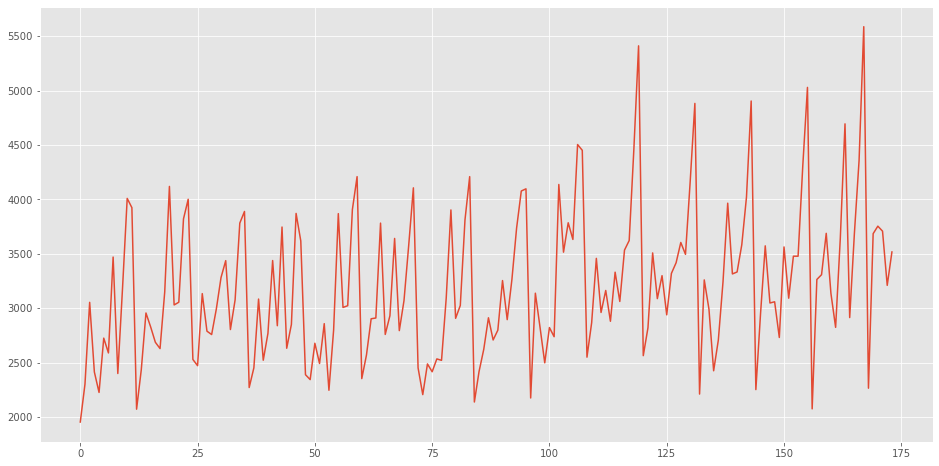

In [6]:
y = df["dry"]
plt.figure(figsize=(16,8))
y.plot()

Наблюдается отличие в модели поведения ряда на первых годах наблюдений

1. Есть ли у ряда тренд? Если есть, то какой аналитической функцией его можно аппроксимировать? </br>
Тренд есть, линейная функция.

2. Есть ли у ряда сезонность? Аддитивная или мультипликативная или какая-то еще? </br>
Есть сезонность, мультипликативная.

3. Меняет ли ряд свой характер? Если да, то нужно отбросить ранние наблюдения. </br>
В целом можно сказать, что не меняет.

4. Есть ли у ряда выбросы? Выброс может изменить модель и испортить прогноз. Заменяем выброс на более разумное значение. </br>
Выбросов нет.

Логарифмируем ряд, хотя особой необходимости в этом нет:

In [7]:
df_1 = df[['dry', 'month_']]

df_1['log_dry'] = np.log10(df_1["dry"])

<AxesSubplot:>

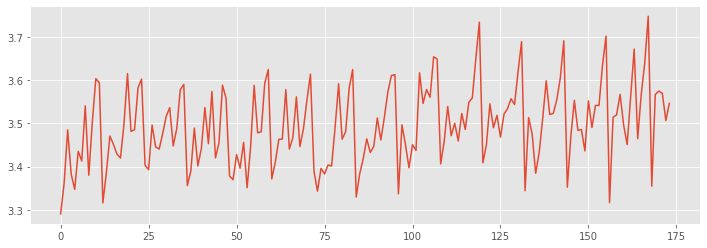

In [8]:
fig = plt.figure(figsize=(12, 4))
df_1['log_dry'].plot()

Сезонные поправки стали аддитивными, что подтверждает гипотезу о мультипликативном характере сезонности исходного ряда.

In [9]:
df_1['month_num'] = range(1, len(df_1) + 1)
df_1['month_num_2'] = df_1['month_num']**2

In [10]:
df_1

,dry,month_,log_dry,month_num,month_num_2
0,1954,1,3.290925,1,1
1,2302,2,3.362105,2,4
2,3054,3,3.484869,3,9
3,2414,4,3.382737,4,16
4,2226,5,3.347525,5,25
...,...,...,...,...,...
169,3685,2,3.566437,170,28900
170,3754,3,3.574494,171,29241
171,3708,4,3.569140,172,29584
172,3210,5,3.506505,173,29929


Отбрасываем исходный ряд:

In [11]:
df_2 = df_1.drop(columns=['dry', 'month_'])
df_2.head()

,log_dry,month_num,month_num_2
0,3.290925,1,1
1,3.362105,2,4
2,3.484869,3,9
3,3.382737,4,16
4,3.347525,5,25


Создадим новые переменные - сезонные индикаторы месяцев:

In [12]:
df_2["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*15)[0:len(df)]
df_2["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*15)[0:len(df)]
df_2["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*15)[0:len(df)]
df_2["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*15)[0:len(df)]
df_2["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*15)[0:len(df)]
df_2["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*15)[0:len(df)]

In [13]:
df_2.head()

,log_dry,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,3.290925,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,3.362105,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,3.484869,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,3.382737,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,3.347525,5,25,0,0,0,0,1,0,0,0,0,0,0,0


In [14]:
# Создаем матрицу предикторов. Не удаляем столбец, соответствующий базовому месяцу:
X = df_2.drop(columns=["log_dry"])

In [15]:
#  Создаем матрицу откликов:
y = df_2['log_dry']

In [16]:
from sklearn.ensemble import RandomForestRegressor

Случайный лес не может предсказывать ряд с трендом, поэтому будем предсказывать ряд из разностей логарифмов значений исходного ряда.

In [17]:
# Для отклика возьмем разности:

y_2 = y.diff(periods=1).dropna()
y_2

1      0.071181
2      0.122764
3     -0.102132
4     -0.035212
5      0.087841
         ...   
169    0.211369
170    0.008057
171   -0.005355
172   -0.062635
173    0.039667
Name: log_dry, Length: 173, dtype: float64

In [18]:
#  В матрице предикторов отбрасываем первую строку, там у y_2 появилось NaN

X_2 = X[1:]

In [19]:
#  все нормально?
X_2.head()

,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
1,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,5,25,0,0,0,0,1,0,0,0,0,0,0,0
5,6,36,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
params = {
    "objective": "reg:squarederror",
    "n_estimators":250,
    "random_state": 42,
    "max_depth": 5
}

In [21]:
import xgboost as xgb

In [22]:
model = xgb.XGBRegressor(**params).fit(X_2, y_2)

Посмотрим на подгонку и ряд разностей:

<AxesSubplot:>

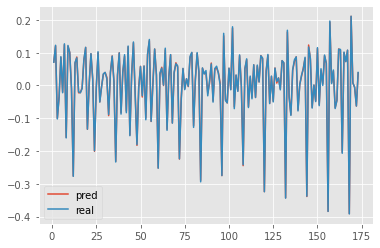

In [23]:
pred = pd.DataFrame({
    'pred': model.predict(X_2),
    'real': y_2})
pred.plot()

Посмотрим на критерий качества - сумма квадратов отклонений:

In [24]:
print("SSE = ", sum((y_2 - model.predict(X_2))**2))

SSE =  0.0015084803261352132


In [25]:
print(model.predict(X_2))

[ 7.14847669e-02  1.20900765e-01 -1.00190751e-01 -3.49381864e-02
  8.60218406e-02 -2.01408211e-02  1.24709345e-01 -1.58316210e-01
  1.19804956e-01  1.00904115e-01 -8.09681322e-03 -2.76464522e-01
  6.75821006e-02  8.68526772e-02 -2.22828761e-02 -2.18240116e-02
 -7.01387366e-03  7.62027204e-02  1.16053998e-01 -1.33854270e-01
  5.92370844e-03  9.65588689e-02  1.89023186e-02 -2.00991452e-01
 -6.12779334e-03  1.00031361e-01 -4.99631129e-02 -2.63420632e-03
  3.39413658e-02  3.96916494e-02  2.50561740e-02 -9.20294896e-02
  3.97697687e-02  9.00361240e-02  1.17148776e-02 -2.31638059e-01
  2.90758722e-02  9.98606011e-02 -8.32178444e-02  4.05054465e-02
  8.88880864e-02 -7.81601742e-02  1.17937386e-01 -1.51371285e-01
  3.38145047e-02  1.30304173e-01 -2.69900355e-02 -1.82765752e-01
 -2.94175488e-03  5.84522597e-02 -3.52526568e-02  5.91551103e-02
 -9.91732851e-02  9.54944491e-02  1.36434615e-01 -1.09917581e-01
  8.18283390e-03  1.11113667e-01  3.16753462e-02 -2.52002686e-01
  3.41559909e-02  5.56156

In [26]:
#  От подгонки разностей переходим к подгонке ряда логарифмов

res = model.predict(X_2)
a = [df_1['log_dry'][0]]
for i in res:
    a.append(a[-1] + i)

print(a)

[3.2909245593827543, 3.3624093262832937, 3.483310091344672, 3.3831193400901136, 3.3481811536830244, 3.4342029942553816, 3.414062173141199, 3.5387715185415325, 3.3804553086292324, 3.500260264648157, 3.6011643791925487, 3.5930675659682927, 3.3166030440833745, 3.384185144713181, 3.471037821879643, 3.448754945805329, 3.426930934226173, 3.4199170605633733, 3.4961197809670446, 3.612173779437351, 3.4783195094559667, 3.4842432178911147, 3.580802086776155, 3.5997044053282914, 3.3987129535880265, 3.3925851602461514, 3.49261652123, 3.4426534083094773, 3.440019201988387, 3.473960567766833, 3.513652217144179, 3.5387083911691186, 3.446678901592302, 3.486448670307207, 3.5764847942982194, 3.588199671858954, 3.3565616128389117, 3.3856374849919555, 3.485498086119103, 3.402280241752076, 3.4427856882457015, 3.531673774624276, 3.453513600433278, 3.571450986469197, 3.4200797011498687, 3.453894205892491, 3.5841983785275695, 3.5572083429787633, 3.3744425909016607, 3.3715008360222307, 3.429953095771405, 3.3947

<AxesSubplot:>

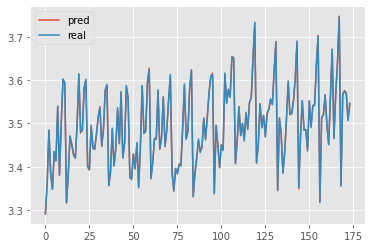

In [27]:
#  Сравним подгонку и ряд

pred = pd.DataFrame({
    'pred': a,
    'real': y})
pred.plot()

Строим прогноз на 8 месяцев вперед:

In [28]:
horizon = 8
df_3= pd.DataFrame()

df_3['month_num'] = range((len(df)+1), (len(df)+horizon+1))
df_3['month_num_2'] = df_3['month_num']**2

In [29]:
len(df)+horizon

182

In [30]:
#  Добавляем индикаторы месяцев:

df_3["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0])[0:horizon]
df_3["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0])[0:horizon]
df_3["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0])[0:horizon]
df_3["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0])[0:horizon]
df_3["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0])[0:horizon]
df_3["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0])[0:horizon]
df_3["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0])[0:horizon]
df_3["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0])[0:horizon]
df_3["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0])[0:horizon]
df_3["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0])[0:horizon]
df_3["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0])[0:horizon]
df_3["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1])[0:horizon]

In [31]:
df_3.head()

,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,175,30625,1,0,0,0,0,0,0,0,0,0,0,0
1,176,30976,0,1,0,0,0,0,0,0,0,0,0,0
2,177,31329,0,0,1,0,0,0,0,0,0,0,0,0
3,178,31684,0,0,0,1,0,0,0,0,0,0,0,0
4,179,32041,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
# Прогноз для разностей:
model.predict(df_3)

array([-0.3478232 ,  0.17901044,  0.04398583,  0.03887022,  0.01931108,
        0.03866136,  0.11507806,  0.07983239], dtype=float32)

In [33]:
# Переходим к прогнозу для логарфмов:
res = model.predict(df_3)
a2 = [df_1["log_dry"][len(df)-1]]
for i in res:
    a2.append(a2[-1] + i)

print(a2)

[3.5461723683169426, 3.1983491657069267, 3.377359601645762, 3.4213454341283382, 3.460215653269583, 3.4795267311623634, 3.5181880956283154, 3.633266157447392, 3.713098547398144]


In [34]:
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
0,3.290925,3.290925,NaN
1,3.362409,3.362105,NaN
2,3.483310,3.484869,NaN
3,3.383119,3.382737,NaN
4,3.348181,3.347525,NaN


In [35]:
df_4 = pd.DataFrame(a2, columns=['forecast'])
df_4['real'] = np.nan
df_4['pred'] = np.nan

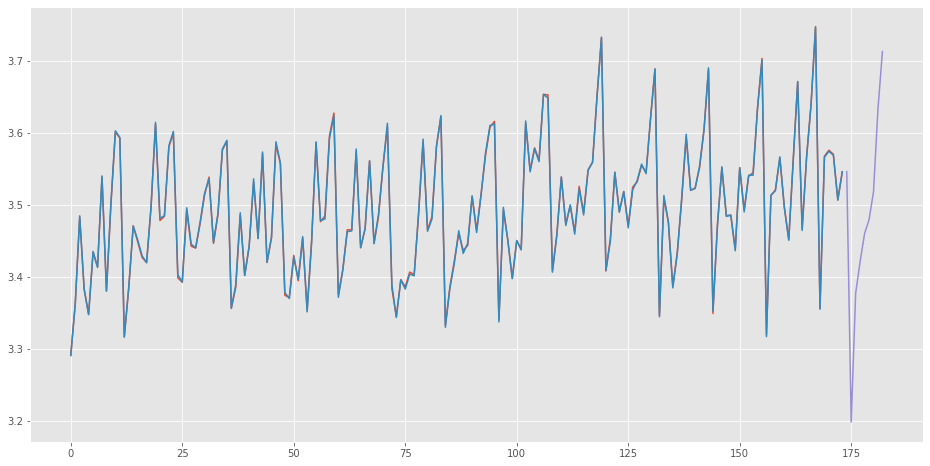

In [36]:
pred_1 = pd.concat(
    [pred, df_4],
    sort=False
).reset_index(drop=True)

plt.figure(figsize=(16,8))
plt.plot(pred_1)
plt.show()

In [37]:
#  Возвращаемся к исходному ряду:
pred_11 = 10**pred_1

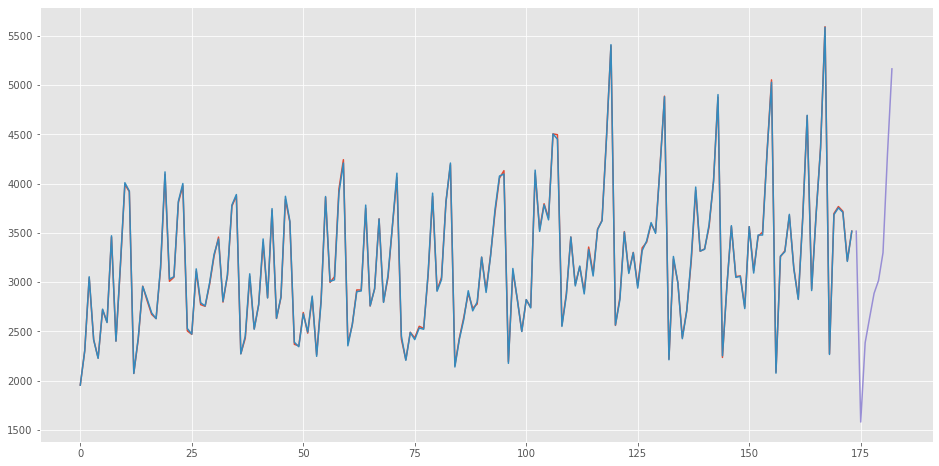

In [38]:
plt.figure(figsize=(16,8))
plt.plot(pred_11)
plt.show()